In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [2]:
df = pd.read_csv("/Users/meomia/Documents/Nora_CO2_emission/data/GPSData/trips/03-07-2022.csv")

In [3]:
unique_count = df["TripLogId"].nunique()

In [4]:
unique_count

538

In [5]:
trip_1 = "6225a07a03d57f0000de776a"
trip_1_all_data = df[df["TripLogId"] == trip_1]

In [6]:
df_info = pd.read_csv("/Users/meomia/Documents/Nora_CO2_emission/data/GPSData/tripsInfo/03-07-2022.csv")

In [19]:
dumper_20 = df_info.iloc[0]

In [8]:
latitude = trip_1_all_data["Latitude"]
longitude = trip_1_all_data["Longitude"]

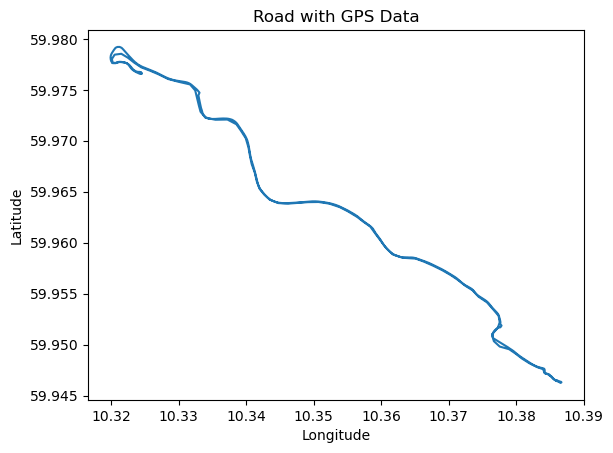

In [9]:
plt.plot(longitude, latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Road with GPS Data')
plt.show()

In [10]:
trip_1_all_data

,TripLogId,Timestamp,Latitude,Longitude,Uncertainty
0,6225a07a03d57f0000de776a,2022-03-07 06:04:41.869000+00:00,59.946488,10.386030,8.942958
1,6225a07a03d57f0000de776a,2022-03-07 06:05:00.868000+00:00,59.946486,10.386051,9.521081
2,6225a07a03d57f0000de776a,2022-03-07 06:05:37.866000+00:00,59.946474,10.386081,8.552684
3,6225a07a03d57f0000de776a,2022-03-07 06:06:36.863000+00:00,59.946478,10.386038,8.830489
4,6225a07a03d57f0000de776a,2022-03-07 06:06:38.863000+00:00,59.946482,10.386002,9.107995
...,...,...,...,...,...
461,6225a07a03d57f0000de776a,2022-03-07 06:28:10.852000+00:00,59.946251,10.386577,7.741341
462,6225a07a03d57f0000de776a,2022-03-07 06:28:16.852000+00:00,59.946309,10.386711,6.940660
463,6225a07a03d57f0000de776a,2022-03-07 06:28:31.851000+00:00,59.946355,10.386654,4.827944
464,6225a07a03d57f0000de776a,2022-03-07 06:28:38.850000+00:00,59.946397,10.386431,4.109600


In [39]:
map_object = folium.Map(location=[trip_1_all_data["Latitude"].mean(), trip_1_all_data["Longitude"].mean()], zoom_start=15)


In [47]:
load_lat = dumper_20["LoadLatitude"]
load_long = dumper_20["LoadLongitude"]
dump_lat = dumper_20["DumpLatitude"]
dump_long = dumper_20["DumpLongitude"]


In [49]:
folium.Marker(
    location =[load_lat, load_long],
    popup = "Dump_Point",
    icon=folium.Icon(color="red", icon="info-sign")).add_to(map_object)

In [50]:
folium.Marker(    
    location =[dump_lat, dump_long],
    popup = "Load_Point",
    icon=folium.Icon(color="red", icon="info-sign")).add_to(map_object)

In [43]:
dumper_20


TripLogId              6225a07a03d57f0000de776a
DumperMachineNumber                          20
MachineType                               Truck
LoadLongitude                          10.38603
LoadLatitude                          59.946488
DumpLongitude                         10.324452
DumpLatitude                           59.97659
MassTypeMaterial                          Stone
Quantity                                   16.0
Name: 0, dtype: object

In [44]:
polyline = folium.PolyLine(locations=trip_1_all_data[['Latitude', 'Longitude']].values.tolist(), color='blue')
polyline.add_to(map_object)


In [51]:
map_object.save('road_map.html')